In [41]:
import sys
import numpy as np
import matplotlib.pyplot as plt
markers = ["d", "o", "v", "^", "<", ">", "1", "X", "p", "P", "*", "+"]
color = ['blueviolet','blue',"green",'orange','red','m']
fmt = ['om','og','or','ok','oy','om']
bands = ['u','g','r','i','z','y']

In [2]:
# 使用 seaborn 的颜色调色板
import seaborn as sns
colors = sns.color_palette("bright", n_colors=3)

In [3]:
from matplotlib import font_manager
font_manager.fontManager.addfont("/home/yltang/data/Times_New_Roman.ttf")
plt.style.use('seaborn-v0_8-paper')
font1 = {'family': 'Times New Roman',
         #'weight': 'normal',
         'size':15,
         }

In [18]:
train_test = "test"

In [19]:
import os
import json
data_file_dir = f"/data/yltang/simulated_data_1/data_new/{train_test}_data/data"
data_file_name = []
for root, dirs, files in os.walk(data_file_dir, topdown=False):
    data_file_name.append(files)

In [20]:
data_file_name

[['SNII_test_data.json',
  'SNIax_test_data.json',
  'SNIa_test_data.json',
  'SNIa-91bg_test_data.json',
  'KN_test_data.json',
  'TDE_test_data.json',
  'SNIbc_test_data.json',
  'AGN_test_data.json',
  'SLSN_test_data.json']]

In [21]:
data_file_name = [
  f'KN_{train_test}_data.json',
  f'SLSN_{train_test}_data.json',
  f'SNIa_{train_test}_data.json',
  f'SNIa-91bg_{train_test}_data.json',
  f'SNIax_{train_test}_data.json',
  f'SNIbc_{train_test}_data.json',
  f'SNII_{train_test}_data.json',
  f'TDE_{train_test}_data.json']

In [22]:
redshift_file_dir = f"/data/yltang/simulated_data_1/data_new/{train_test}_data/redshift"
redshift_file_name = []
for root, dirs, files in os.walk(redshift_file_dir, topdown=False):
    redshift_file_name.append(files)

In [23]:
redshift_file_name

[['SNII_test_redshift.json',
  'SLSN_test_redshift.json',
  'SNIbc_test_redshift.json',
  'SNIax_test_redshift.json',
  'SNIa-91bg_test_redshift.json',
  'SNIa_test_redshift.json',
  'TDE_test_redshift.json',
  'AGN_test_redshift.json',
  'KN_test_redshift.json']]

In [24]:
redshift_file_name = [
  f'KN_{train_test}_redshift.json',
  f'SLSN_{train_test}_redshift.json',
  f'SNIa_{train_test}_redshift.json',
  f'SNIa-91bg_{train_test}_redshift.json',
  f'SNIax_{train_test}_redshift.json',
  f'SNIbc_{train_test}_redshift.json',
  f'SNII_{train_test}_redshift.json',
  f'TDE_{train_test}_redshift.json']

In [25]:
def load_json_file(json_file):
    with open(json_file, "r") as file:
        data = json.load(file)
    return data

In [26]:
redshift_list = []
data_list = [] 

for i in redshift_file_name[:]:
    print(i)
    redshift = load_json_file(redshift_file_dir+"/"+i)
    redshift_list.append(redshift)

for i in data_file_name[:]:
    data = load_json_file(data_file_dir+"/"+i)
    data_list.append(data)

KN_test_redshift.json
SLSN_test_redshift.json
SNIa_test_redshift.json
SNIa-91bg_test_redshift.json
SNIax_test_redshift.json
SNIbc_test_redshift.json
SNII_test_redshift.json
TDE_test_redshift.json


In [27]:
len(data_list), len(redshift_list)

(8, 8)

In [28]:
len(data_list[0])

2800

In [29]:
import numpy as np
a = [1,2,3]
b = [1,2,3]
a+b

[1, 2, 3, 1, 2, 3]

In [30]:
# 合并json文件
data = data_list[0]
print(len(data))
label = list(np.zeros(shape=(len(data),)))
print("label",len(label))

for i in range(len(data_list)-1):
    print(len(data_list[i+1]))
    label_ = list(np.zeros(shape=(len(data_list[i+1]),))+i+1)
    print("label",len(label_))
    data = data + data_list[i+1]
    label = label + label_

2800
label 2800
3500
label 3500
3000
label 3000
1552
label 1552
1354
label 1354
441
label 441
1739
label 1739
3800
label 3800


In [17]:
redshift_info = redshift_list[0]
for i in range(len(redshift_list)-1):
    redshift_info = redshift_info + redshift_list[i+1]

redshift_info = redshift_info + redshift_info

In [31]:
redshift_info_ = redshift_list[0]
for i in range(len(redshift_list)-1):
    redshift_info_ = redshift_info_ + redshift_list[i+1]

redshift_info_ = redshift_info_ + redshift_info_

In [32]:
len(redshift_info), len(redshift_info_)

(6700, 36372)

In [33]:
redshift_info_ = redshift_info_[200:]

In [34]:
import random

def get_shuffled_list(lst):
    # 复制列表并打乱
    shuffled_lst = lst[:]
    random.shuffle(shuffled_lst)
    return shuffled_lst


# 获得打乱后的列表并打印结果
redshift_info_ = get_shuffled_list(redshift_info_)

In [35]:
len(redshift_info_)

36172

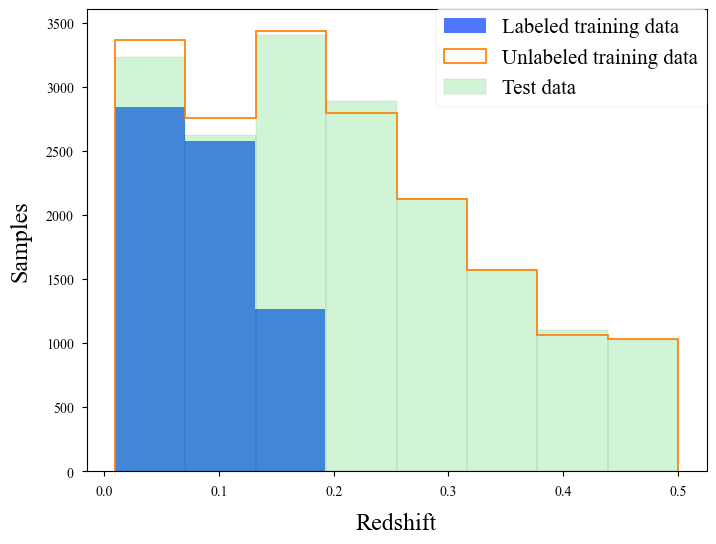

In [45]:
# 绘图比较三个数据集之间的红移分布差别
# 共享y轴
figure,ax= plt.subplots(1,1,figsize=(8,6),sharey=True)

#创建制图数据

ax.hist(redshift_info, bins=3, alpha=0.7, color=colors[0], label="Labeled training data")
ax.hist(redshift_info_[18000:],bins=8, alpha=1,  histtype="step", linewidth=1.2, color=colors[1], label="Unlabeled training data")
ax.hist(redshift_info_[:18000], bins=8, alpha=0.2, color=colors[2],edgecolor='black', label="Test data")


plt.xticks(fontsize="xx-large",fontproperties="Times New Roman")
plt.yticks(fontsize="xx-large",fontproperties="Times New Roman")
    
plt.xlabel("Redshift",fontsize="xx-large",labelpad=10,fontproperties="Times New Roman")
plt.ylabel("Samples",fontsize="xx-large",labelpad=10,fontproperties="Times New Roman")

plt.legend(fontsize="x-large",loc="upper right",
        prop=font1,
         borderaxespad=0.)


#plt.savefig(f"latent_distribution_{number}.jpg",bbox_inches='tight')
plt.savefig(f"redshift_distribution.jpg",bbox_inches='tight')
plt.show()

In [19]:
print(len(data), len(redshift_info), len(label))

19686 19686 19686


最终要保存的文件：
data, label and redshift

In [16]:
import json
# 将三个数据集和对应的红移参数保存到JSON文件
with open(f'/home/yltang/data/simulated_data_1/data_new/data_v1/train_label_data.json', 'w') as file:
    json.dump(data, file)
with open(f'/home/yltang/data/simulated_data_1/data_new/data_v1/train_label_label.json', 'w') as file:
   json.dump(label, file)
with open(f'/home/yltang/data/simulated_data_1/data_new/data_v1/train_label_redshift.json', 'w') as file:
    json.dump(redshift_info, file)